In [1]:
import sys

sys.path.append("..")

In [2]:
from nrc import NoisyRingsClustering
from experiments.datagen import random_circles, random_noise
import numpy as np
import matplotlib.pyplot as plt
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import save_experiment

INFO:nrc.fuzzycmeans:[FuzzyCMeans] Converged after 6 iterations. Stopping early.
INFO:nrc:[NoisyRingsClustering] Converged partly after 18 iterations. Recomputing noise mask and continuing. Total noise samples are 109.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 19 iterations. Recomputing noise mask and continuing. Total noise samples are 110.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 22 iterations. Recomputing noise mask and continuing. Total noise samples are 0.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 23 iterations. Recomputing noise mask and continuing. Total noise samples are 110.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 24 iterations. Recomputing noise mask and continuing. Total noise samples are 0.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 25 iterations. Recomputing noise mask and continuing. Total noise samples are 110.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 26 iterations. Recomputing noise m

[[3.66019217e+02 3.77746563e+02 3.94521461e+02 4.08557318e+02
  4.22979527e+02 4.37242386e+02 4.49476542e+02 4.68159897e+02
  4.81952572e+02 4.88699109e+02 5.03352088e+02 5.12790292e+02
  5.22221227e+02 5.24067866e+02 5.37214576e+02 5.48275083e+02
  5.61785607e+02 5.53475635e+02 5.52794882e+02 5.48699275e+02
  5.45822864e+02 5.49157069e+02 5.40402669e+02 5.29327211e+02
  5.19565972e+02 5.13264718e+02 5.01223160e+02 4.90883590e+02
  4.77468104e+02 4.64910485e+02 4.48713932e+02 4.35835951e+02
  4.20109396e+02 4.04810015e+02 3.91094316e+02 3.75764347e+02
  3.67589664e+02 3.58410115e+02 3.39859527e+02 3.36640340e+02
  3.34018805e+02 3.27635016e+02 3.26832669e+02 3.20710859e+02
  3.21079932e+02 3.24600353e+02 3.31782426e+02 3.41520384e+02
  3.55535697e+02 3.68440398e+02 2.53951576e+01 1.94279888e+01
  2.42422434e+01 2.08890114e+01 2.40342327e+01 2.35244688e+01
  1.29974023e+01 1.02696005e+01 1.78828441e+01 1.34752234e+01
  1.81056109e+01 2.49796306e+01 2.23498721e+01 1.93678178e+01
  3.0253

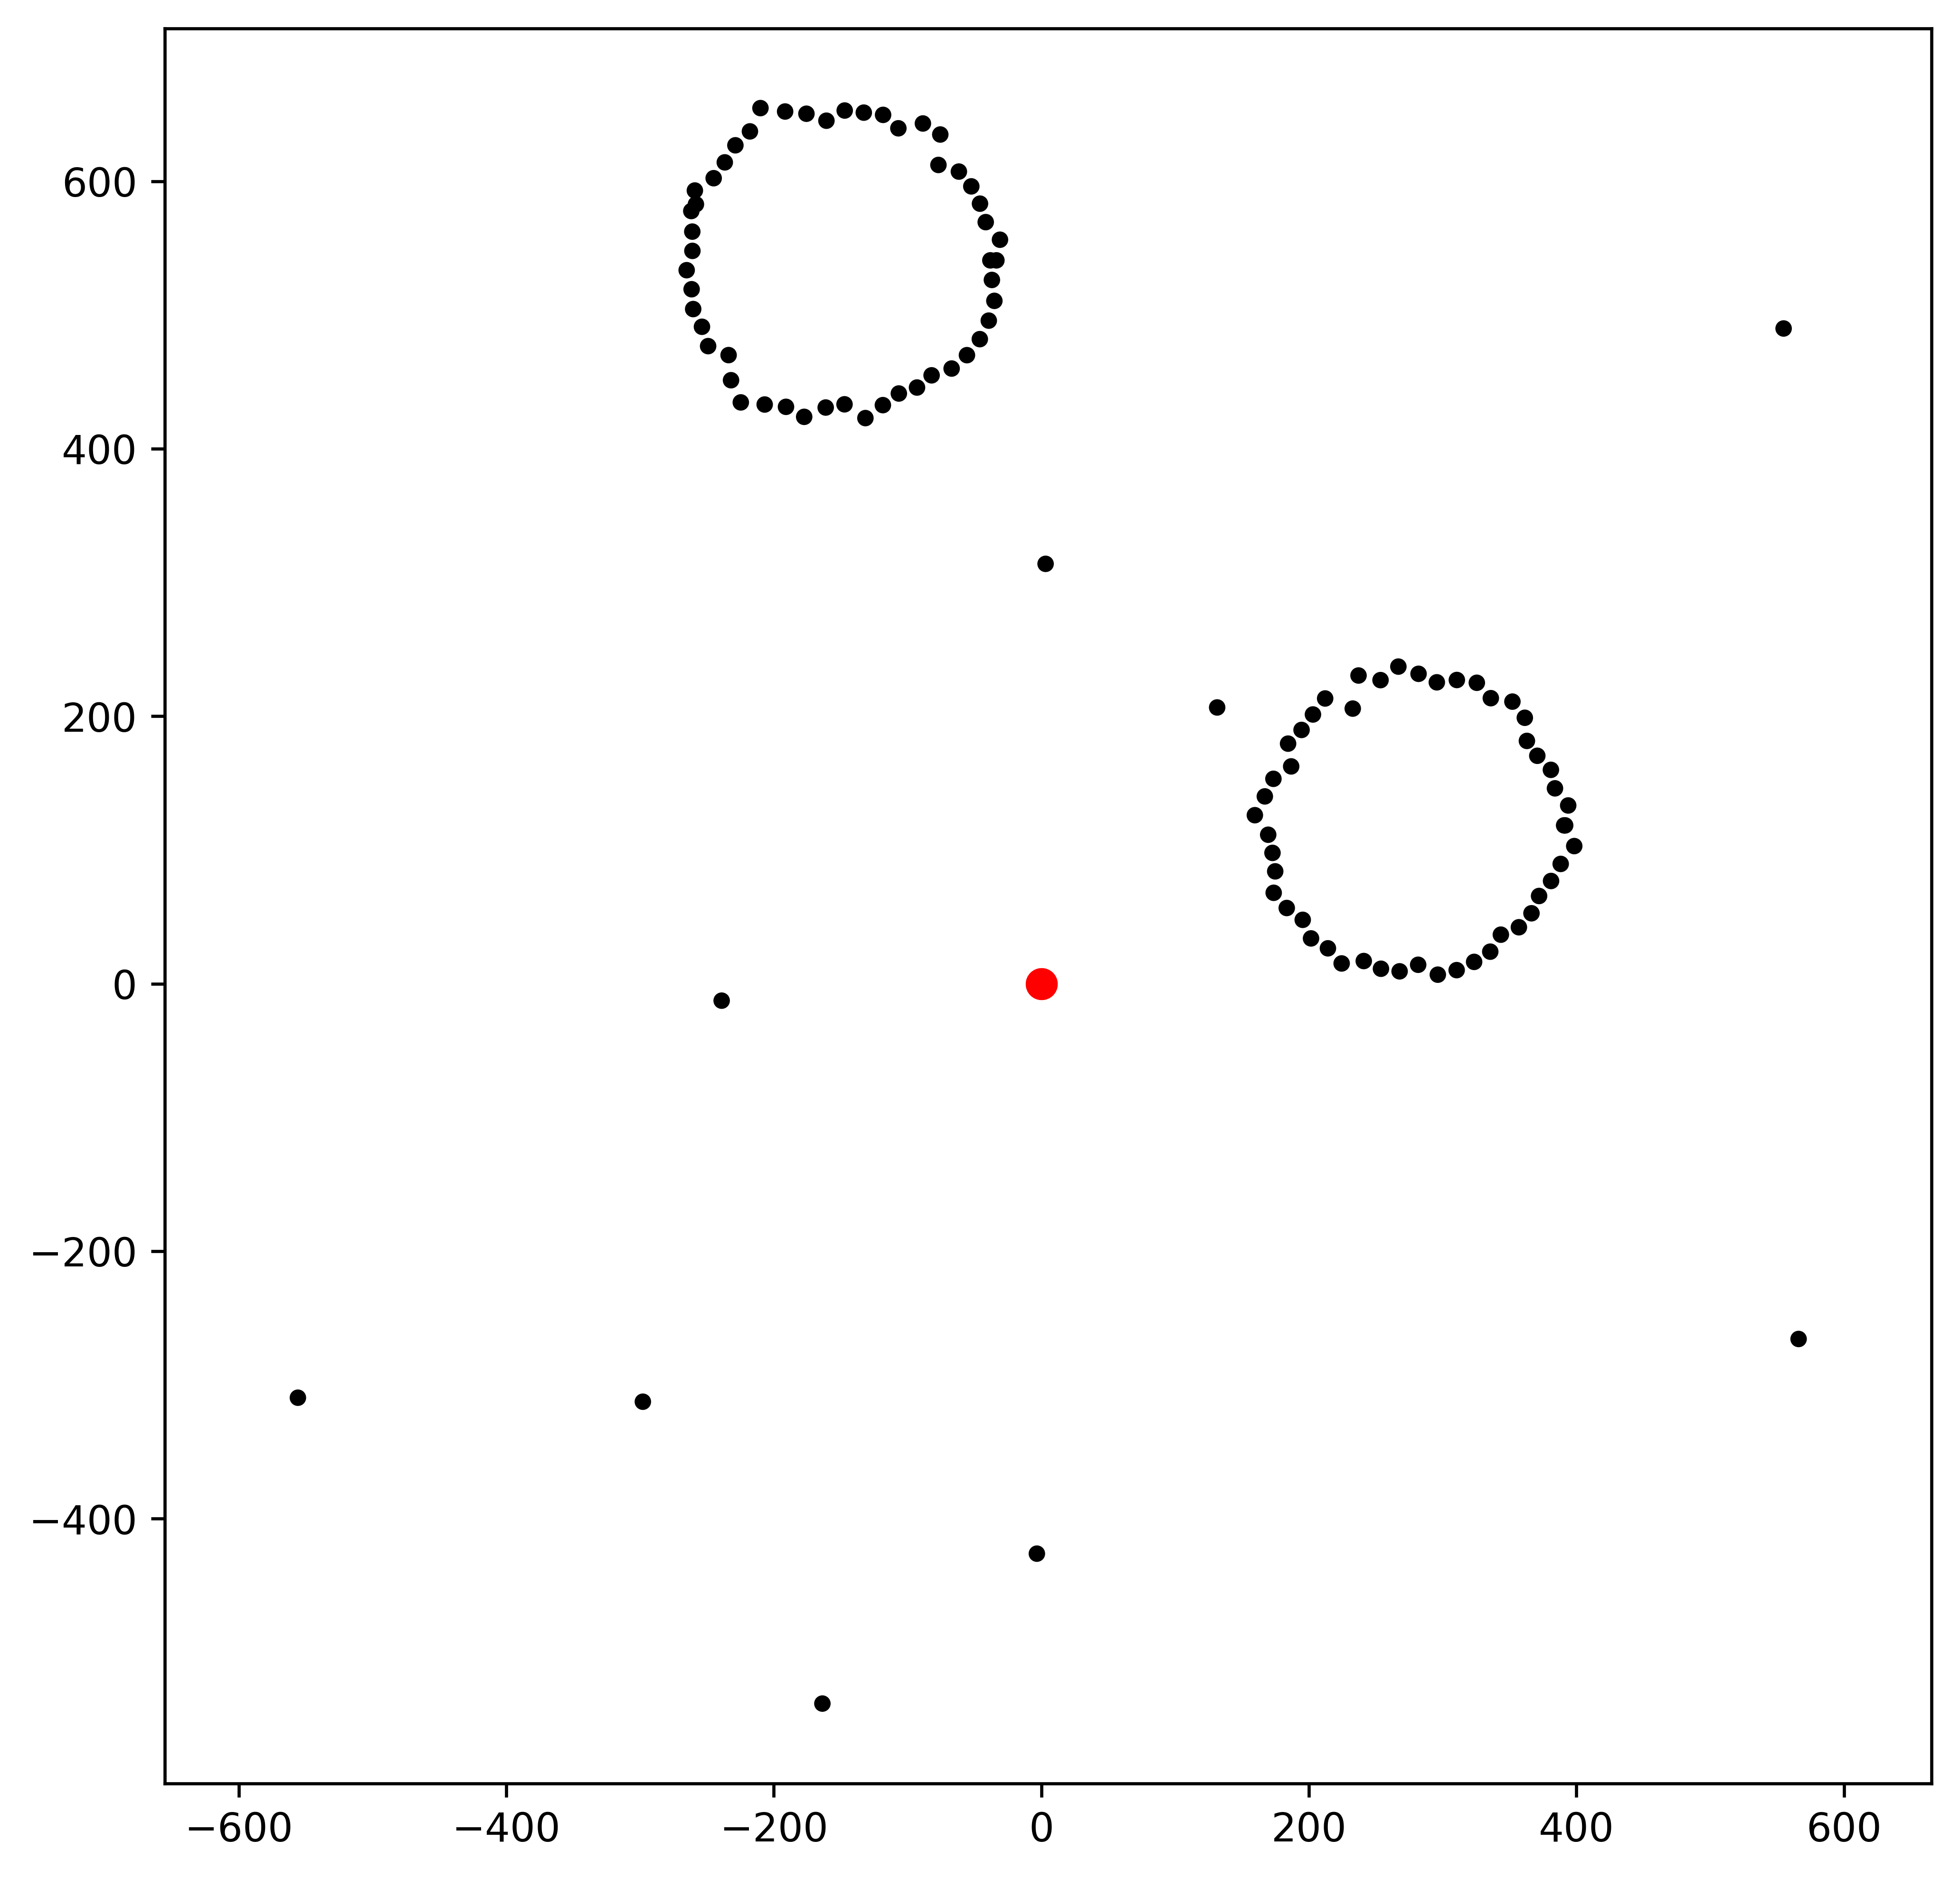

In [3]:
# high res plt
plt.rcParams["figure.dpi"] = 600
# set size
plt.rcParams["figure.figsize"] = (8, 8)
# Assuming random_circles and random_noise are defined functions
# that generate the necessary data

# Generate circles and noise data
center_delims = np.array([[-600, -600], [-600, 600], [600, -600], [600, 600]])
minmax_radius = np.array([100, 200])
n_rings = 2
circles = random_circles(center_delims, minmax_radius, 50, n_rings, noise=5)

# Generate additional noise
noise = random_noise(center_delims, 10, 0.1)

# Combine circles and noise
circles = np.concatenate([circles, noise])


# Fit the clustering model
model = NoisyRingsClustering(
    n_rings=n_rings,
    q=1.2,
    convergence_eps=0,
    max_iters=3300,
    noise_distance_threshold=2.5,
    apply_noise_removal=True,
)
model.fit(circles)

# mask = model.prune_noise(threshold=1.5, reestimate_centers_and_radii=False)
# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()

# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(n_rings)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < n_rings:
    raise ValueError(
        "Not enough distinct vibrant colors for the number of rings")
plot_results(circles, radii, centers, memberships,
             vibrant_colors, show_noise=True)

In [4]:
NAME = "noisy_rings"
save_experiment(model, data=circles, name=NAME)

AttributeError: 'NoisyRingsClustering' object has no attribute 'noise_entropy_threshold'